# Cross Validation and Prediction Using Regression Tree

# Practice

## Decision Tree Regressor

Task 1

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

### Loading Data

In [ ]:
data_df1=pd.read_excel('/Users/vamseemuppavarapu/Archanaa_NIIT/Tree_Regressor_cross_val/DS2_C5_S5_HR_Data_Practice.xlsx')

data_df=data_df1

In [ ]:
data_df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


### 1. Data Exploration

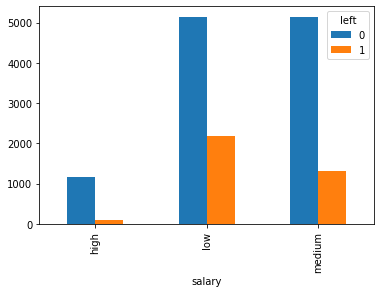

In [ ]:
# analyzing the impact of salary in employee retention
pd.crosstab(data_df['salary'],data_df['left']).plot(kind='bar')

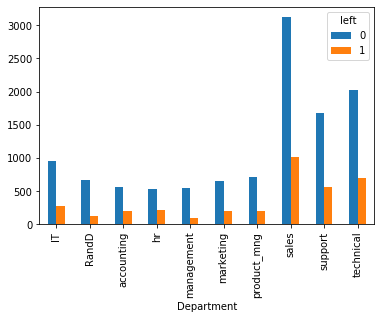

In [ ]:
# departmentwise employee retention rate
# visualizing rention rate department wise
pd.crosstab(data_df['Department'],data_df['left']).plot(kind='bar')

### Task 2. Preprocessing

In [ ]:
# check missing values in data
print(data_df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64


In [ ]:
# finding correlation
cor=data_df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


In [ ]:

# Converting object data types into categorical column
data_df['salary']=data_df['salary'].astype('category')
data_df['Department']=data_df['Department'].astype('category')

In [ ]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['salary_encode']= label_encoder.fit_transform(data_df['salary'])
data_df['salary_encode'].unique()

data_df['Department_encode']= label_encoder.fit_transform(data_df['Department'])
data_df['Department_encode'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [ ]:
# Remove column name 'salary and left'
data_new=data_df
data_new=data_new.drop(columns=['salary','left','salary_encode'], axis = 1)
data_new.columns



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary_num',
       'Department_encode'],
      dtype='object')

### Task 3. Modelling

In [ ]:
X=data_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'Department_encode']]
y=data_df['salary_num']




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (10499, 8)
Size of test dataset:  (4500, 8)


In [ ]:
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

y_pred=dtm.predict(x_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.03888461463821791
R-Squared on test dataset=0.06086234588671302


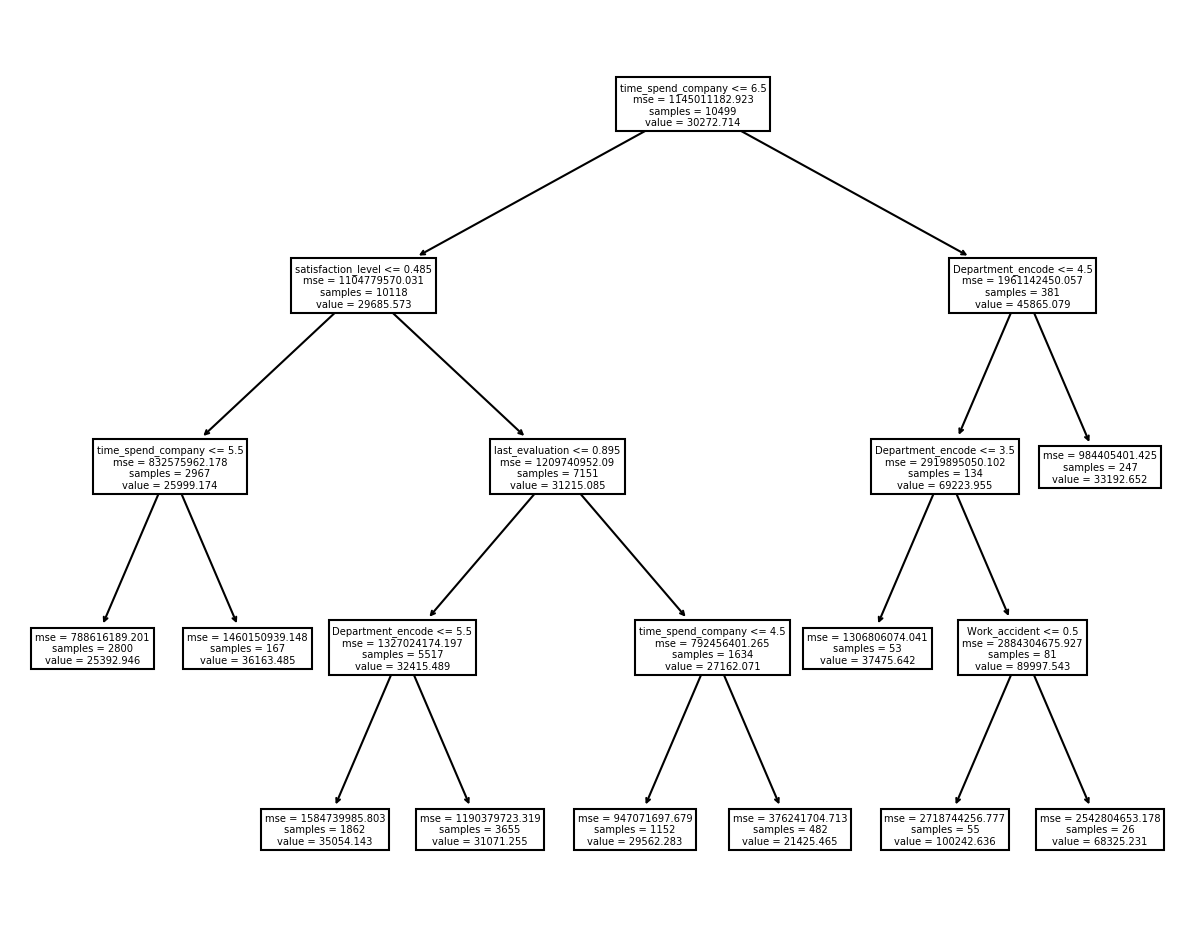

In [ ]:
#visualization of Regressor tree

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtm, feature_names=X.columns);

How to calculate precision, recall and acc when it is a regression pbm

error in concept code book under modelling fit method used in model prediction

In [ ]:
max_depth = [1,3,5,7,9,11,13,15]

for depth in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth=depth,random_state=42),x,y,cv=kf,scoring='neg_mean_squared_error')
    print('Max Depth is: ',depth)
    rmse(score.mean())

Impoertant

Startified Kfold is applied only for classification tasks